In [1]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# loading CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# check shapes
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
# creating the variable for class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

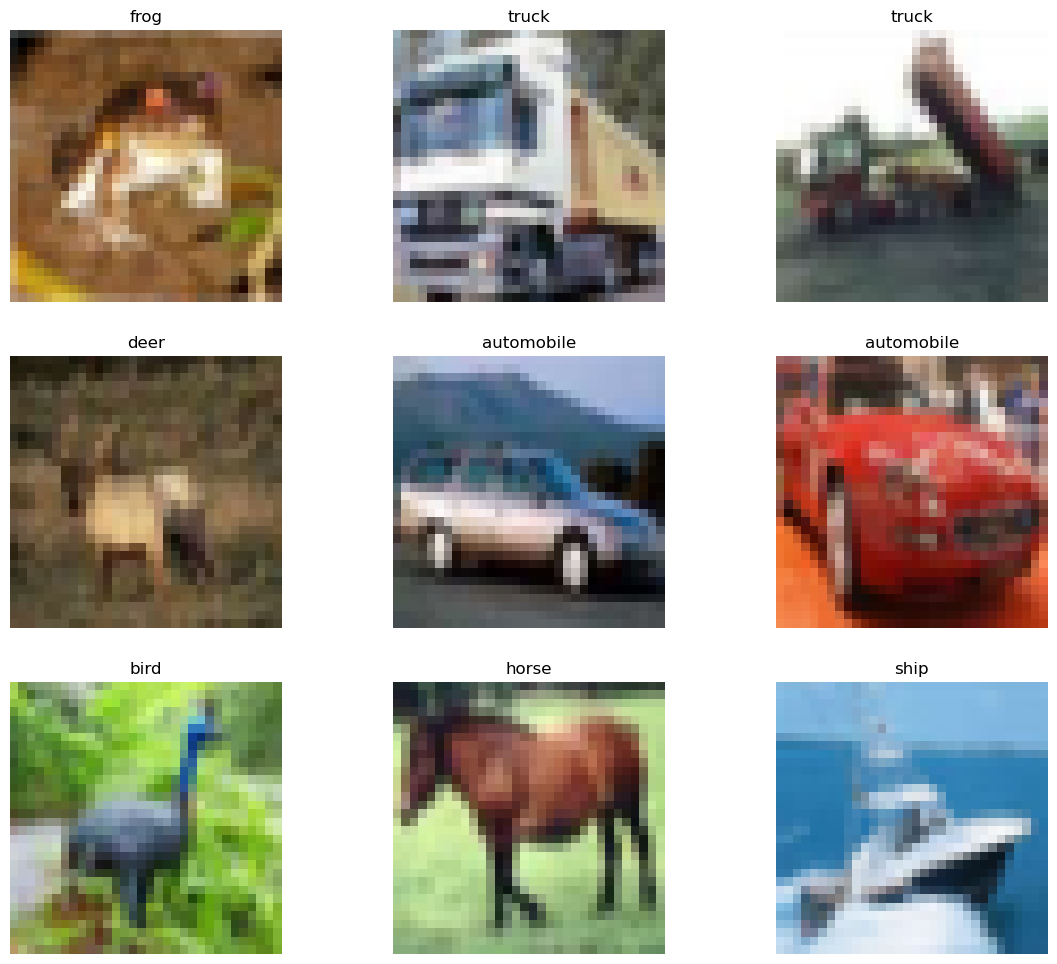

In [5]:
# visualizing a few images 
plt.figure(figsize=(14, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [6]:
# normalizing pixel values
x_train = x_train/255.0
x_test = x_test/255.0


In [7]:
# check
x_train.min() == 0.0
x_train.max() == 1.0

True

In [8]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
generate_data = ImageDataGenerator(rotation_range=15, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
generate_data.fit(x_train)

In [9]:
# convert labels to categorical (one-hot encoding) for multi-class classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
#building a simple CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# training the model
history = model.fit(generate_data.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test))

C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.2756 - loss: 1.9243 - val_accuracy: 0.4998 - val_loss: 1.3756
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4691 - loss: 1.4753 - val_accuracy: 0.5713 - val_loss: 1.1891
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5303 - loss: 1.3223 - val_accuracy: 0.6220 - val_loss: 1.0759
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5620 - loss: 1.2407 - val_accuracy: 0.6254 - val_loss: 1.0584
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5857 - loss: 1.1771 - val_accuracy: 0.6457 - val_loss: 1.0148
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6052 - loss: 1.1221 - val_accuracy: 0.6712 - val_loss: 0.9554
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6170 - loss: 1.0889 - val_accuracy: 0.6823 - val_loss: 0.9110
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6347 -

In [12]:
# saving model
model.save('cifar10_model.h5')

In [13]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7362 - loss: 0.7694


[0.7738158702850342, 0.734000027179718]

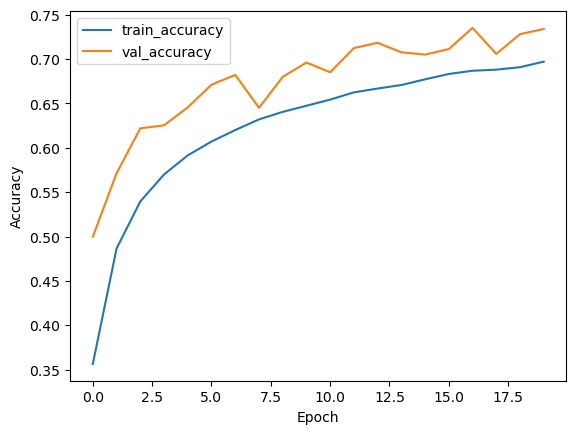

In [14]:
# visualization: plot training/validation loss and accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


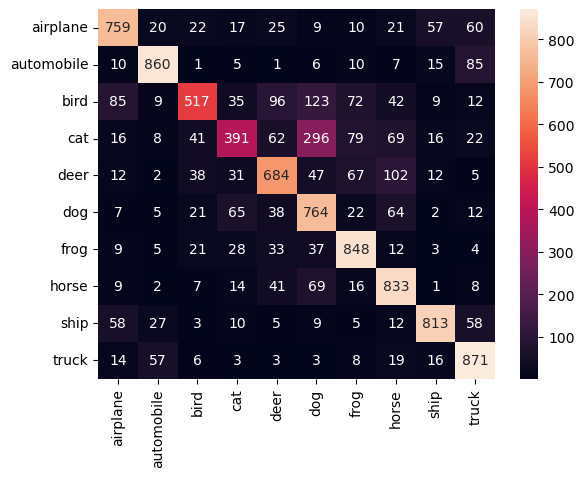

In [15]:
# confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.show()          

In [34]:
# with a case of mild overfitting, I'd want to implement measures to mitigate that, starting with a higher dropout rate
# would restart by data augmentation
generate_data.fit(x_train)

In [38]:
# building a simple CNN, this time with higher dropout and BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(), # new addition
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6), # was previously 0.5...refer back to cell 10
    Dense(10, activation='softmax')
])

C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Recompiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# checking the model summary, just because
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,938 (738.04 KB)

 Trainable params: 188,874 (737.79 KB)

 Non-trainable params: 64 (256.00 B)

In [59]:
# training the model this time with early stopping
from tensorflow import keras  # forgot to import keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
history_wes = model.fit(generate_data.flow(x_train, y_train, batch_size=32),
                        epochs=50, # increased epochs with early stopping involved
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.6975 - loss: 0.8858 - val_accuracy: 0.7084 - val_loss: 0.8905
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.7080 - loss: 0.8660 - val_accuracy: 0.7293 - val_loss: 0.8241
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7077 - loss: 0.8698 - val_accuracy: 0.7385 - val_loss: 0.7927
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7110 - loss: 0.8579 - val_accuracy: 0.7114 - val_loss: 0.8758
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7119 - loss: 0.8504 - val_accuracy: 0.7243 - val_loss: 0.8711
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.7147 - loss: 0.8453 - val_accuracy: 0.7216 - val_loss: 0.8638


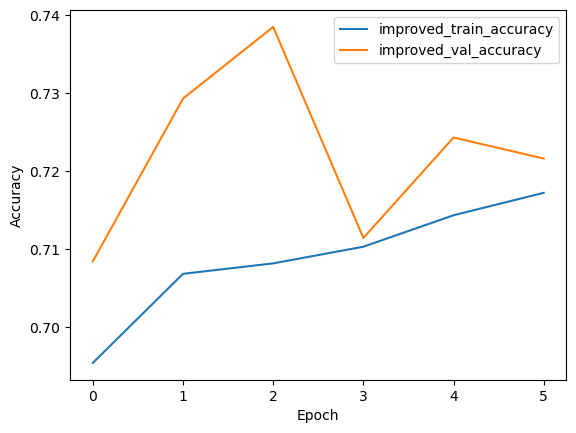

In [64]:
plt.plot(history_wes.history['accuracy'], label='improved_train_accuracy')
plt.plot(history_wes.history['val_accuracy'], label='improved_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
# evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Improved Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7226 - loss: 0.8579
Improved Test Accuracy: 0.72


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


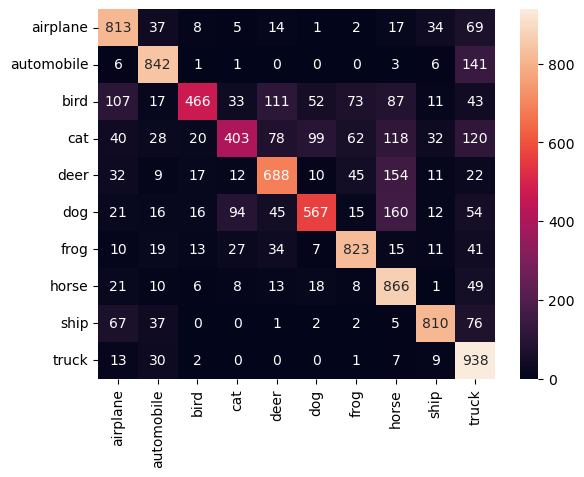

In [70]:
# confusion matrix after mild overfitting correction
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.show()